# Super Store's Exploratory data analysis(EDA) With Python

## 1. What is Exploratory Data Analysis
In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

This is an example of EDA in Python from [here](https://medium.com/python-pandemonium/introduction-to-exploratory-data-analysis-in-python-8b6bcb55c190)! 

## 2. EDA with Python

Multiple libraries are available to perform basic EDA but here we will use [Pandas](https://pandas.pydata.org) and [matplotlib](https://matplotlib.org) for this post. We will use pandas for data manipulation and matplotlib for plotting graphs. We are using a Jupyter notebook to write code and showcase our graphs.

Links:
* 10 minutes to Pandas: [https://pandas.pydata.org/pandas-docs/stable/10min.html](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* 20 minutes to Matplotlib [https://www.tutorialdocs.com/article/python-matplotlib-tutorial.html](https://www.tutorialdocs.com/article/python-matplotlib-tutorial.html]

## 3. Let's get Coding!

### Step 1: Import Libraries

Let's load the necessary libraries in python! You will also notice a special command for the Jupyter notebook `%matplotlib inline`. This command allows you to render plot inline in notebook cells. You will shortly see what happens.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Load and clean your data

First, we read the data for the appropriate file. The file is located in the same directory as our notebook. If it was located to a different directory we should have specified the appropriate path. 

The two next commands load the data from the `csv` file and print the first few lines.

In [2]:
df = pd.read_csv('data.csv')
print(df.head())

  BranchName  Week  DayWeek  Day  Month  Hour Transaction_Type  Units   Amount
0    MyStore     1        3    2      1     9             Card      3   $54.00
1    MyStore     1        3    2      1    10             Cash      7  -$17.80
2    MyStore     1        3    2      1    10             Card      7   $41.99
3    MyStore     1        3    2      1    11             Card     20  $412.50
4    MyStore     1        3    2      1    12             Cash      1  -$18.00


The `Amount` column contains entries with the `$` sign. These entries are interpreted as strings and we cannot run analytics. Let's remove them. Pandas allow you to perform simple string operations. 

Below, we remove the `$` sign and then convert the string field into numeric. Once done, column `Amount` contains `float` data entries and now we can perform mathematical operations on this field.

In [3]:
df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')
df['Amount'] = pd.to_numeric(df['Amount'])
print(df.head())

  BranchName  Week  DayWeek  Day  Month  Hour Transaction_Type  Units  Amount
0    MyStore     1        3    2      1     9             Card      3   54.00
1    MyStore     1        3    2      1    10             Cash      7  -17.80
2    MyStore     1        3    2      1    10             Card      7   41.99
3    MyStore     1        3    2      1    11             Card     20  412.50
4    MyStore     1        3    2      1    12             Cash      1  -18.00


One more thing, the `BranchName` field is unnecessary for our analysis since we only have data from a single store so let’s remove it! Option `inpace=True` removes the field from the existing `DataFrame` without re-assigning it.

In [4]:
# Remove unwanted 
df.drop('BranchName',axis=1, inplace=True)
df.head()

,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,1,3,2,1,9,Card,3,54.00
1,1,3,2,1,10,Cash,7,-17.80
2,1,3,2,1,10,Card,7,41.99
3,1,3,2,1,11,Card,20,412.50
4,1,3,2,1,12,Cash,1,-18.00


### Step 3: Exploring the clean data
Operation cleanup is done, let’s dive into the data and find insights!
The very first thing we are going to do is to find out the number of records and the number of columns. For that we will execute the command `df.shape`.

In [5]:
df.shape

(4100, 8)

What does it mean? It’s actually rows * columns. So here there are 4100 records and 9 columns. What if we need a detailed summary of this data? What if we want some statistics? We can use `df.describe()` for this!


In [6]:
df.describe()

,Week,DayWeek,Day,Month,Hour,Units,Amount
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,34.017805,4.183902,15.812195,8.231463,12.949024,12.779512,35.237046
std,14.714289,1.967864,8.810817,3.396586,2.631853,17.854968,183.538724
min,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,-1041.800000
25%,29.000000,3.000000,8.000000,7.000000,11.000000,3.000000,-47.000000
50%,37.000000,4.000000,16.000000,9.000000,13.000000,8.000000,-2.385000
75%,45.000000,6.000000,23.000000,11.000000,15.000000,16.000000,99.512500
max,53.000000,7.000000,31.000000,12.000000,19.000000,274.000000,1487.000000


We have some interesting information given here. Let's focus on **count**. We see the same record count 4100 for all columns. This means that there are **no missing fields** in this dataset. You can also check an individual column count, say, for `Units` as follows:

In [7]:
df['Units'].count()

4100

### Step 4: Data Distributions
Command `describe` gives us a generic picture: what is the mean, min, and max along with standard deviation (std) and median. The percentiles are also there. Standard Deviation is quite useful tool to figure out how the data is spread above or below the mean. For instance the standard deviation for `Amount` is 183.5, while the mean is around 35. On other hand the mean for `Units` is 12.7 and the standard deviation is 17.85. Let’s plot the empirical distribution of `Amount` column (i.e., a histogram).

## Distribution Plot

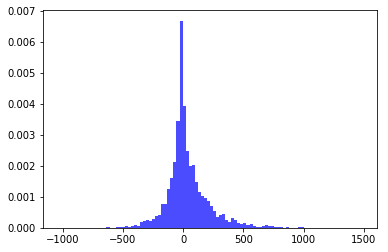

In [10]:
num_bins = 100
plt.hist(df['Amount'], num_bins, normed=1, facecolor='blue', alpha=0.7)
plt.show()

Let's ignore this spike for a while and notice the base line which is very large! It varies from `-1000` to `1000+`. Let's investigate something more interesting. Let’s find out about the `Sales` by `Month`, `Day`, and `Hour`.

### Step 5: Sales by Month, Day and Hour

We will use the `.groupby()` functionality of pandas and `.size()` to get the aggregated value of the particular column only. If we want the aggregated value for every column we can use `.count()`. Since we only need for `Month` we use `.size()`.

### By Month

Month
1     604
7     606
8     572
9     580
10    581
11    587
12    570
dtype: int64


Text(0,0.5,'Total Sales')

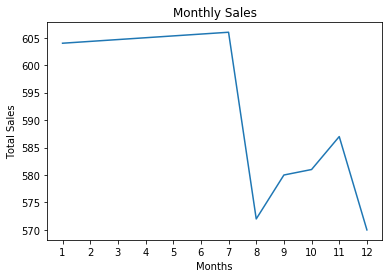

In [11]:
sales_by_month = df.groupby('Month').size()
print(sales_by_month)
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Sales')

We see that everything was great until July but then something happened and there was a sharp decline in August, then staff tried hard for next 3 months and then things died again. Let's investigate by day.

### By Day

In [ ]:
sales_by_day = df.groupby('Day').size()
plot_by_day = sales_by_day.plot(title='Daily Sales',xticks=(range(1,31)),rot=55)
plot_by_day.set_xlabel('Day')
plot_by_day.set_ylabel('Total Sales')

Sales drop towards the end of each month. We also see that the 18th day is quite good. That day we sold 151 units. What happens every hour?

### By Hour

In [ ]:
sales_by_hour = df.groupby('Hour').size()
plot_by_hour = sales_by_hour.plot(title='Hourly Sales',xticks=(range(5,22)))
plot_by_hour.set_xlabel('Working Hours')
plot_by_hour.set_ylabel('Total Sales')

 Majority of the customers come in afternoon. The frequency gets quite low during closing time.